<a href="https://colab.research.google.com/github/Ghiles1010/test_SIC_9/blob/main/problem_0601.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coding Problem #0601

### "NLP Classification Analysis."

#### Answer the following questions by providing Python code:
#### Objectives:
- Pre-processing of text data.
- Create a TF IDF representation.
- Carry out the predictive analysis using the Naive Bayes algorithm. 

In [231]:
import numpy as np
import pandas as pd

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')               # Turn the warnings off.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Read in data:
Movie review data from Cornell CS department. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [ ]:
# Downloading dataset

!wget https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
!tar xvzf review_polarity.tar.gz

In [233]:
# Specify the folder and read in the subfolders.
reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [234]:
len(my_docs)

2000

In [235]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000]))

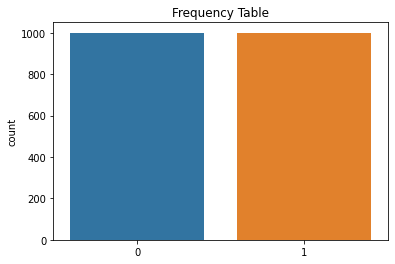

In [236]:
# Visualize the response variable.
sns.countplot(y).set_title("Frequency Table")
plt.show()

1). Carry out the data pre-processing:

In [237]:
def cleantxt(txt):
    """
    Cleans the string passed. Cleaning Includes-
    1. remove special characters/symbols
    2. convert text to lower-case
    3. retain only alphabets
    4. remove words less than 3 characters
    5. remove stop-words
    """  
    # collecting english stop words from nltk-library
    stpw = stopwords.words('english')
    
    # Adding custom stop-words
    stpw.extend(['www','http','utc'])
    stpw = set(stpw)

    txt = txt.decode('utf-8')
    
    # using regex to clean the text
    txt = re.sub(r"\n", " ", txt)
    txt = re.sub("[\<\[].*?[\>\]]", " ", txt)
    txt = txt.lower()
    txt = re.sub(r"[^a-z ]", " ", txt)
    txt = re.sub(r"\b\w{1,3}\b", " ",txt)
    txt = " ".join([x for x in txt.split() if x not in stpw])
    return txt


for idx, text in enumerate(my_docs):
  my_docs[idx] = cleantxt(text)


# 2). Create a TF IDF representation.

In [238]:
vect = TfidfVectorizer(decode_error='ignore',stop_words='english')

X = vect.fit_transform(my_docs).toarray()

3). Apply the Naive Bayes algorithm. Calculate the accuracy.

In [239]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)


In [240]:
# Training.
NB = GaussianNB()
NB.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [241]:
# Testing.
Y_pred = NB.predict(X_test)

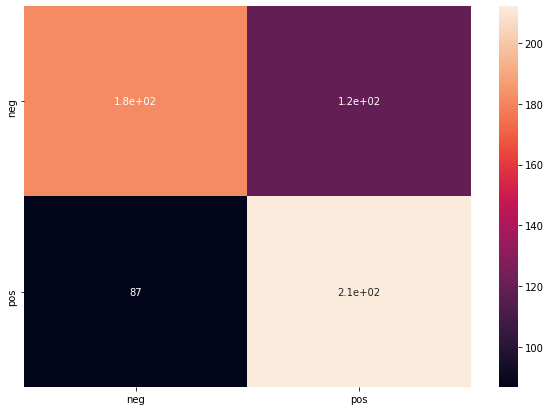

In [242]:
matrix = confusion_matrix(Y_test, Y_pred)

df_cm = pd.DataFrame(matrix, index = ['neg', 'pos'], columns = ['neg', 'pos'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [243]:
#use accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy = ", accuracy)

Accuracy =  0.6566666666666666
